In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# All Libary
import numpy as np
import pandas as pd
import seaborn as sn
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/Lab 6/eighthr.data.csv', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,1/1/1998,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0.0
1,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
2,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0
3,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0.0
4,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,?,?,?,?,?,?,?,?,0.58,0.0


In [ ]:
# Checking all data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534 entries, 0 to 2533
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2534 non-null   object 
 1   1       2534 non-null   object 
 2   2       2534 non-null   object 
 3   3       2534 non-null   object 
 4   4       2534 non-null   object 
 5   5       2534 non-null   object 
 6   6       2534 non-null   object 
 7   7       2534 non-null   object 
 8   8       2534 non-null   object 
 9   9       2534 non-null   object 
 10  10      2534 non-null   object 
 11  11      2534 non-null   object 
 12  12      2534 non-null   object 
 13  13      2534 non-null   object 
 14  14      2534 non-null   object 
 15  15      2534 non-null   object 
 16  16      2534 non-null   object 
 17  17      2534 non-null   object 
 18  18      2534 non-null   object 
 19  19      2534 non-null   object 
 20  20      2534 non-null   object 
 21  21      2534 non-null   object 
 22  

In [ ]:
df.describe()

,73
count,2534.000000
mean,0.063141
std,0.243265
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
df.drop([0], axis=1, inplace=True)


In [ ]:
df

,1,2,3,4,5,6,7,8,9,10,...,64,65,66,67,68,69,70,71,72,73
0,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,2.3,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0.0
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0.0
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,?,?,?,?,?,?,?,?,0.58,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,2.2,...,0.07,7.93,-4.41,5800,-25.6,21.8,10295,65,0,0.0
2530,1,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,2.4,...,0.04,5.95,-1.14,5845,-19.4,19.1,10310,15,0,0.0
2531,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,1.5,...,0.06,7.8,-0.64,5845,-9.6,35.2,10275,-35,0,0.0
2532,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1,1.9,2,...,0.25,7.72,-0.89,5845,-19.6,34.2,10245,-30,0.05,0.0


In [ ]:
for i in df.columns:
    df[i]=df[i].replace(["?"],np.nan)

In [ ]:
df.isna().sum()

1     299
2     292
3     294
4     292
5     293
     ... 
69    125
70     95
71    158
72      2
73      0
Length: 73, dtype: int64

In [ ]:
for i in df.columns[:-1]:
    df[i]=df[i].astype(str).astype(float)

In [ ]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        df[i]=df[i].ffill()

In [ ]:
df.isnull().sum()

1     0
2     0
3     0
4     0
5     0
     ..
69    0
70    0
71    0
72    0
73    0
Length: 73, dtype: int64

### Null Value handle is done. We can compare with previous null vaue count and current count.

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
1,2534.0,1.716338,1.243329,0.0,0.7,1.5,2.40,7.50
2,2534.0,1.675493,1.240033,0.0,0.6,1.4,2.60,7.70
3,2534.0,1.587017,1.188603,0.0,0.6,1.4,2.10,7.10
4,2534.0,1.509234,1.151433,0.0,0.7,1.2,2.10,7.30
5,2534.0,1.484925,1.157878,0.0,0.6,1.1,2.10,7.20
...,...,...,...,...,...,...,...,...
69,2534.0,37.428848,11.240708,-10.1,32.4,41.2,45.20,59.15
70,2534.0,10164.293607,52.476512,9975.0,10130.0,10160.0,10195.00,10350.00
71,2534.0,-0.134175,35.304800,-135.0,-20.0,0.0,15.00,140.00
72,2534.0,0.375691,1.323917,0.0,0.0,0.0,0.05,20.65


array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>,
        <Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>, <Axes: title={'center': '6'}>,
        <Axes: title={'center': '7'}>, <Axes: title={'center': '8'}>,
        <Axes: title={'center': '9'}>],
       [<Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>,
        <Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>,
        <Axes: title={'center': '14'}>, <Axes: title={'center': '15'}>,
        <Axes: title={'center': '16'}>, <Axes: title={'center': '17'}>,
        <Axes: title={'center': '18'}>],
       [<Axes: title={'center': '19'}>, <Axes: title={'center': '20'}>,
        <Axes: title={'center': '21'}>, <Axes: title={'center': '22'}>,
        <Axes: title={'center': '23'}>, <Axes: title={'center': '24'}>,
        <Axes: title={'center': '25'}>, <Axes: title={'center': '26'}>,
        <Axes: title={'center': '27'}>],
       [<Axes: title={

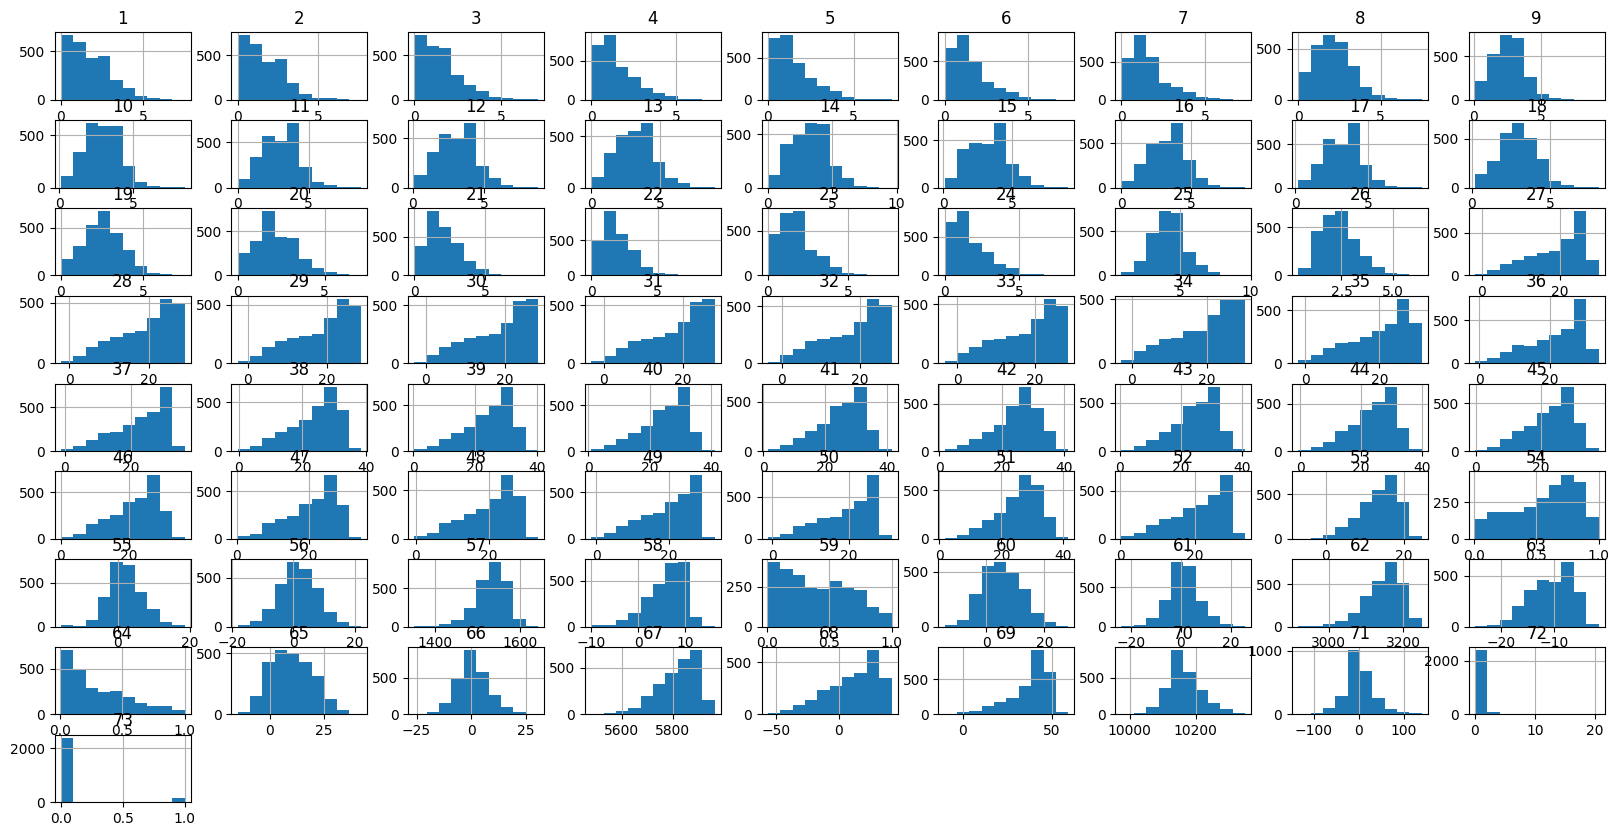

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
df.hist()

In [ ]:
df.isnull().sum()
# No null value

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
# Checking for duplicates Value
df.duplicated().value_counts()

False    2526
True        8
dtype: int64

# AT THIS MOMENT I WANT TO KEEP THE DUPLICATE VALUE AS DELETING MIGHT BE CASUE OF DATA LOSS.
# Few data can have same value of ozone

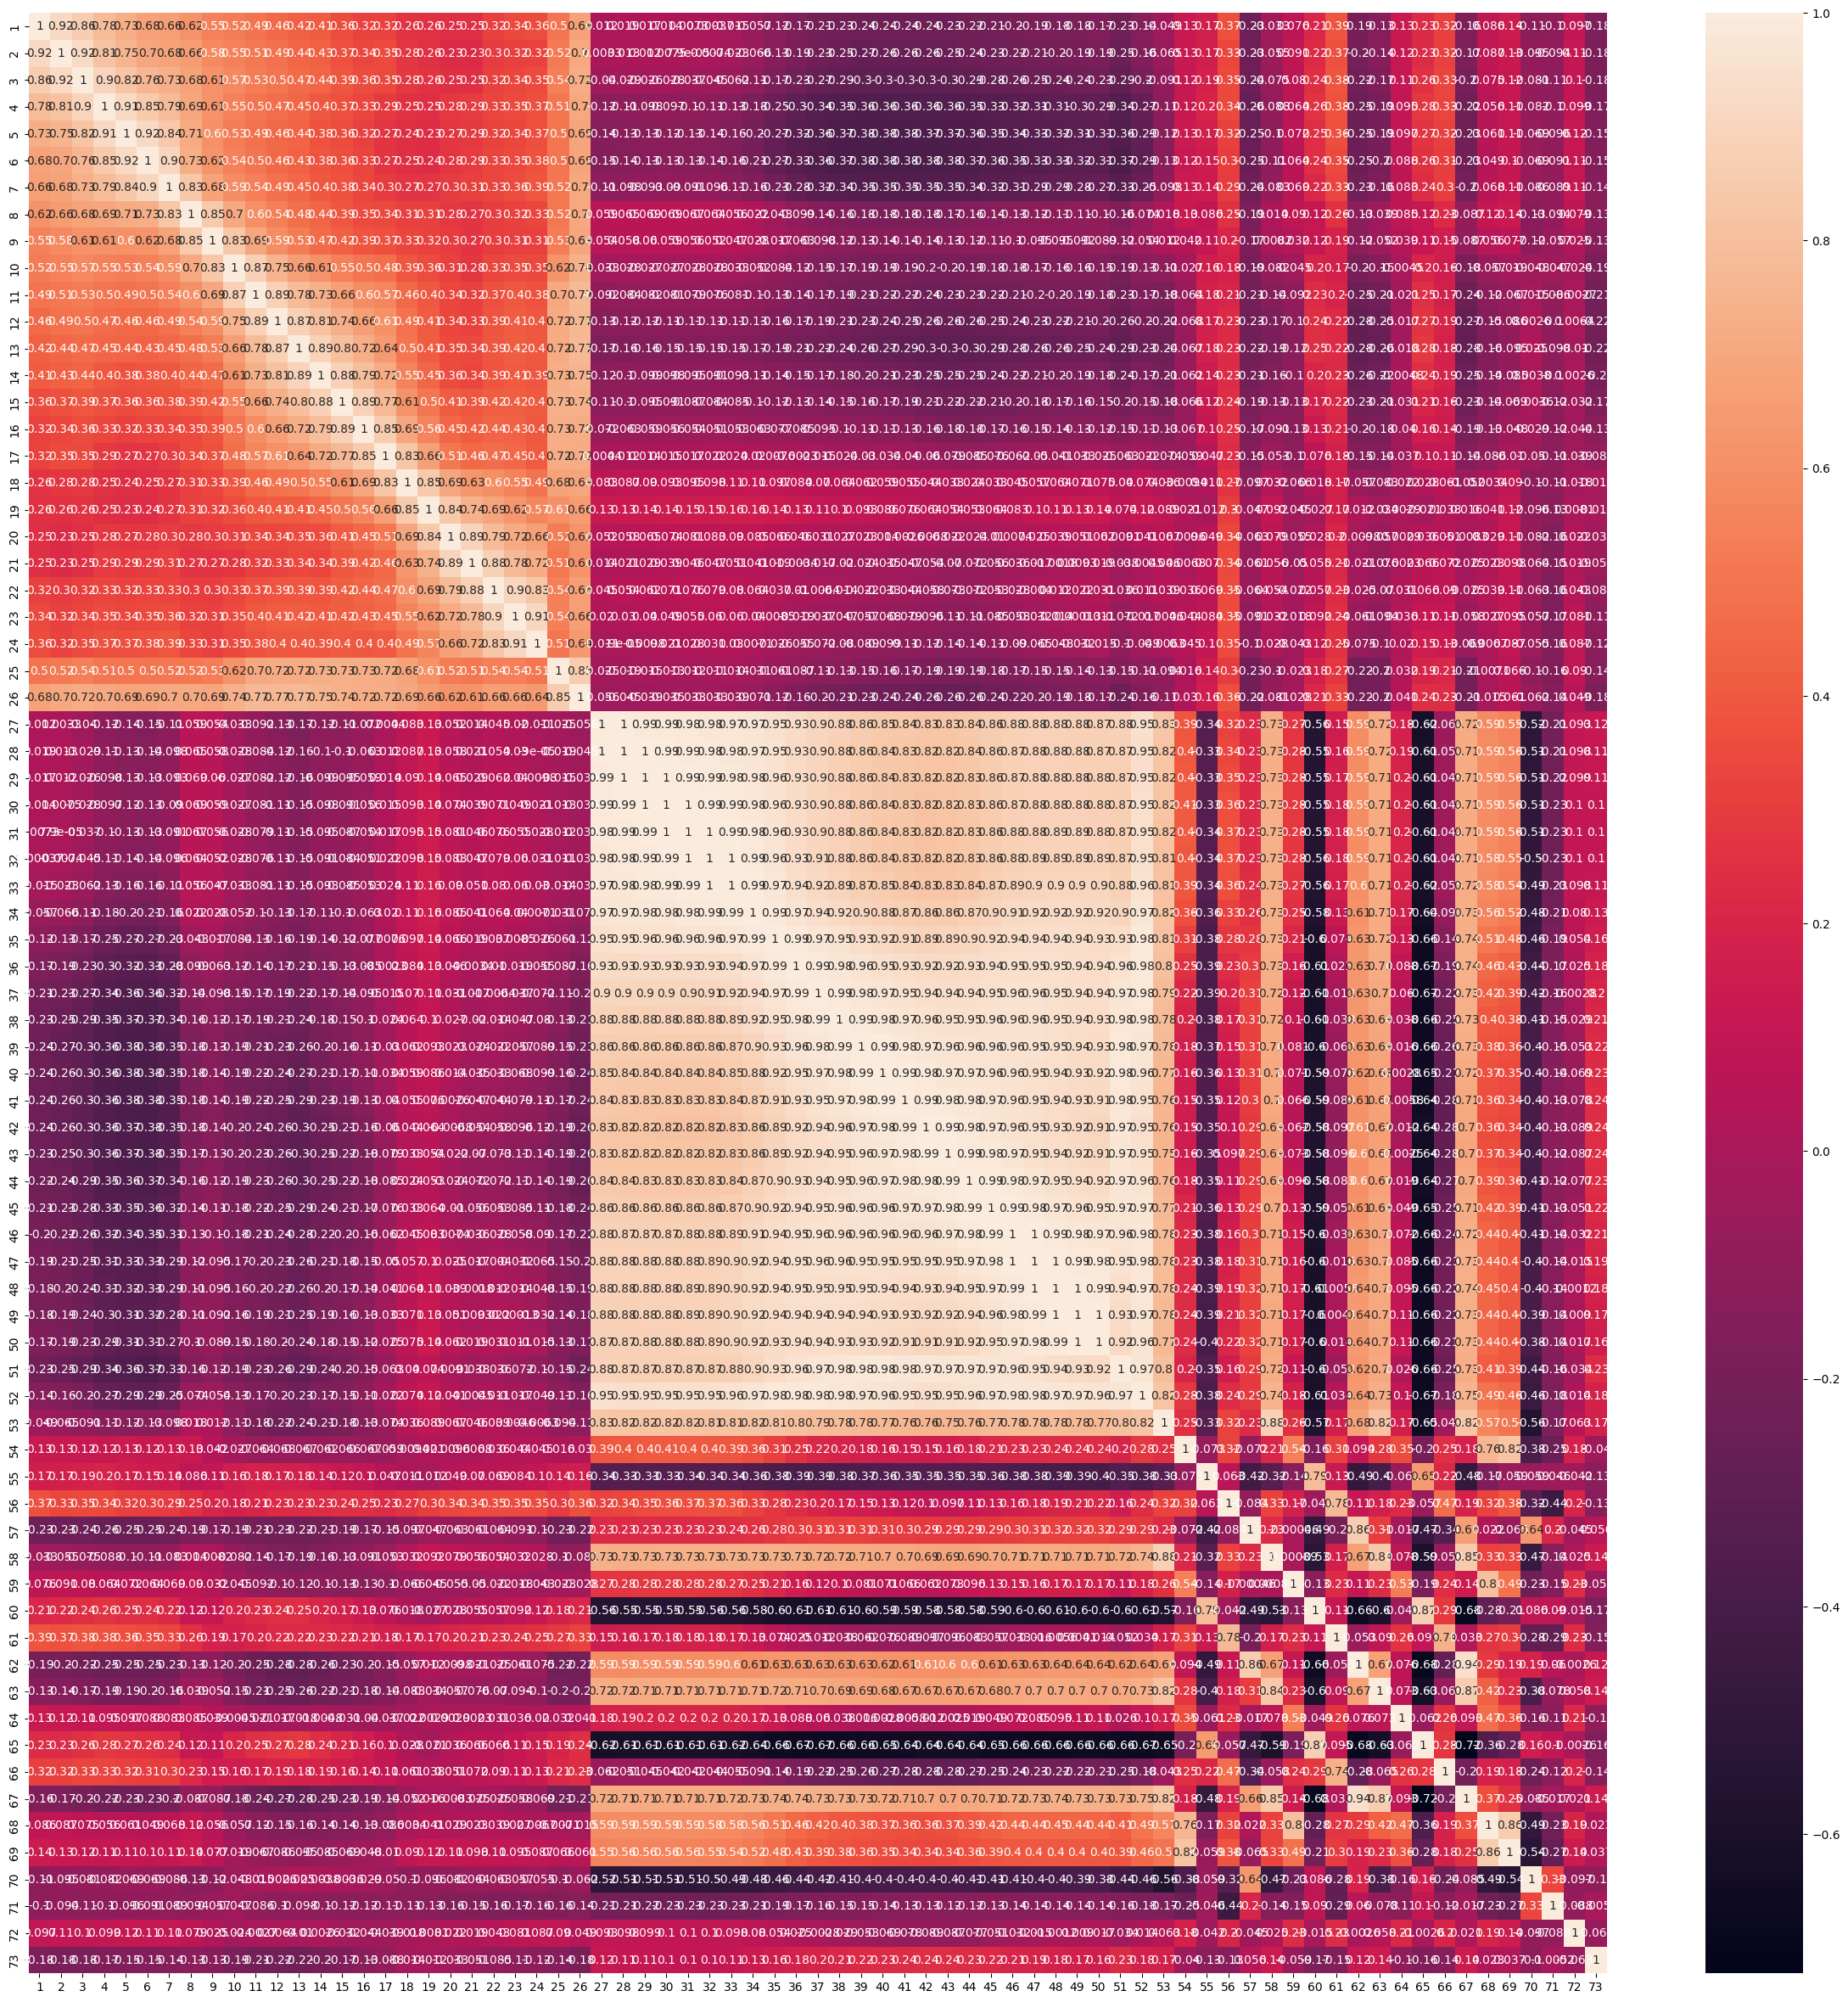

In [ ]:
# See the power of relation between coleumns

corrMatrix = df.corr()
plt.subplots(figsize=(30, 30))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
corrMatrix[73].sort_values(ascending=False)

73    1.000000
42    0.244009
43    0.240586
41    0.238275
44    0.233880
        ...   
10   -0.185901
14   -0.197527
11   -0.213221
12   -0.216613
13   -0.219500
Name: 73, Length: 73, dtype: float64

In [ ]:
def get_corelated_col(cor_dat, threshold):
    feature=[]
    value=[]
    for i ,index in enumerate(cor_dat.index):
        if cor_dat[index] > threshold:
            feature.append(index)
            value.append(cor_dat[index])
    df = pd.DataFrame(data = value, index = feature, columns=['corr value'])
    return df

top_corelated_values = get_corelated_col(corrMatrix[73], 0)
top_corelated_values

,corr value
27,0.122254
28,0.113623
29,0.108731
30,0.104929
31,0.100952
32,0.100182
33,0.106395
34,0.132822
35,0.160400
36,0.181079


In [ ]:
final = df[top_corelated_values.index]
final.shape

(2534, 35)

In [ ]:
from sklearn.preprocessing import StandardScaler
X = final.drop(73, axis=1)
scaler = StandardScaler()
X =  scaler.fit_transform(X)
Y = final[73]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, Y,  test_size=0.2, random_state=42
)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       474
         1.0       0.80      0.12      0.21        33

    accuracy                           0.94       507
   macro avg       0.87      0.56      0.59       507
weighted avg       0.93      0.94      0.92       507



In [ ]:
def logistReg(x_test,y_test,x_train,y_train, model):
    # Fit the model on train
    #predict on test

    y_predict = model.predict(x_test)
    y_predictprob = model.predict_proba(x_test)

    coef_df = pd.DataFrame(model.coef_,columns=list(x_train.columns))
    coef_df['intercept'] = model.intercept_
    model_score = model.score(x_train, y_train)
    print(f"Accuracy of Training Data: {model_score}")
    model_score = model.score(x_test, y_test)
    print(f"Accuracy of Test Data: {model_score}")
    print(coef_df)
    print(metrics.classification_report(y_test,y_predict))
    cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

    df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                      columns = [i for i in ["Predict 1","Predict 0"]])
    plt.figure(figsize = (8,5))
    sn.heatmap(df_cm, annot=True)
    plt.show()
    print("f1 score", metrics.f1_score(y_test,y_predict))
    print("Auc Roc Score: ",metrics.roc_auc_score(y_test,y_predict))
    return y_predictprob,y_predict

In [ ]:
y_predict = model.predict(X_test)
y_predictprob = model.predict_proba(X_test)
model_score = model.score(X_test, y_test)
print(f"Accuracy of Test Data: {model_score}")

Accuracy of Test Data: 0.9408284023668639


In [ ]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       474
         1.0       0.80      0.12      0.21        33

    accuracy                           0.94       507
   macro avg       0.87      0.56      0.59       507
weighted avg       0.93      0.94      0.92       507



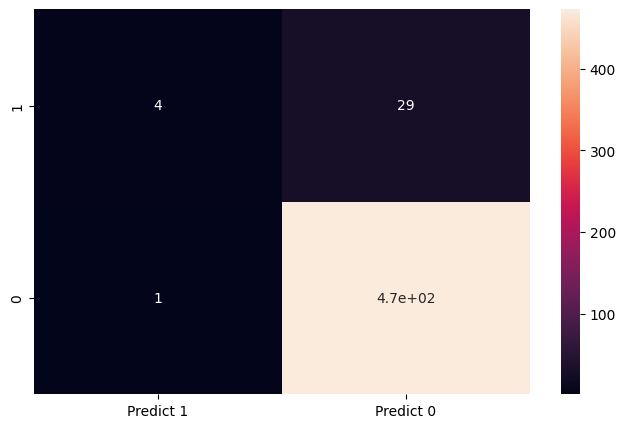

f1 score 0.2105263157894737
Auc Roc Score:  0.5595512082853854


In [ ]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (8,5))
sn.heatmap(df_cm, annot=True)
plt.show()
print("f1 score", metrics.f1_score(y_test,y_predict))
print("Auc Roc Score: ",metrics.roc_auc_score(y_test,y_predict))

# Decision tree Classifier

In [ ]:
 from sklearn import tree

In [ ]:
model1 = tree.DecisionTreeClassifier()

In [ ]:
model1.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.4649015874145786, 0.96875, 'x[14] <= 0.898\ngini = 0.117\nsamples = 2027\nvalue = [1900, 127]'),
 Text(0.20300932517084283, 0.90625, 'x[14] <= 0.344\ngini = 0.06\nsamples = 1658\nvalue = [1607, 51]'),
 Text(0.07289293849658314, 0.84375, 'x[13] <= -0.17\ngini = 0.023\nsamples = 1121\nvalue = [1108, 13]'),
 Text(0.02733485193621868, 0.78125, 'x[14] <= -0.583\ngini = 0.005\nsamples = 737\nvalue = [735, 2]'),
 Text(0.018223234624145785, 0.71875, 'gini = 0.0\nsamples = 520\nvalue = [520, 0]'),
 Text(0.03644646924829157, 0.71875, 'x[24] <= -0.675\ngini = 0.018\nsamples = 217\nvalue = [215, 2]'),
 Text(0.018223234624145785, 0.65625, 'x[31] <= -0.882\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.009111617312072893, 0.59375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.02733485193621868, 0.59375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.05466970387243736, 0.65625, 'x[27] <= -1.344\ngini = 0.009\nsamples = 212\nvalue = [211, 1]'),
 Text(0.04555808656036447, 0.593

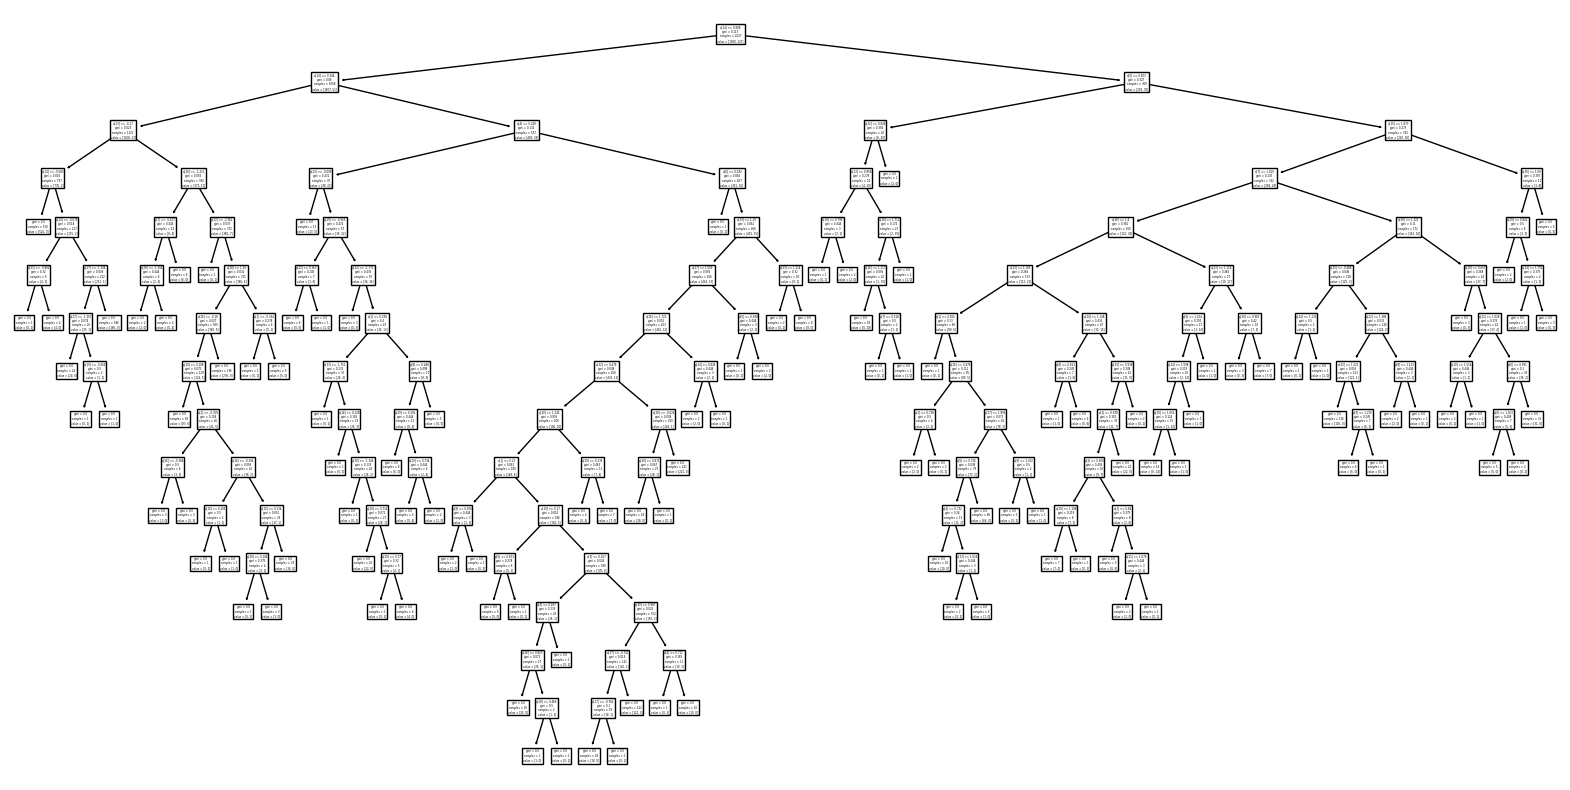

In [ ]:
tree.plot_tree(model1)

In [ ]:
y_predict= model1.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
acc= accuracy_score(y_test, y_predict)
print('Accuracy is ',acc*100)

Accuracy is  91.12426035502959


In [ ]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       474
         1.0       0.32      0.33      0.33        33

    accuracy                           0.91       507
   macro avg       0.64      0.64      0.64       507
weighted avg       0.91      0.91      0.91       507



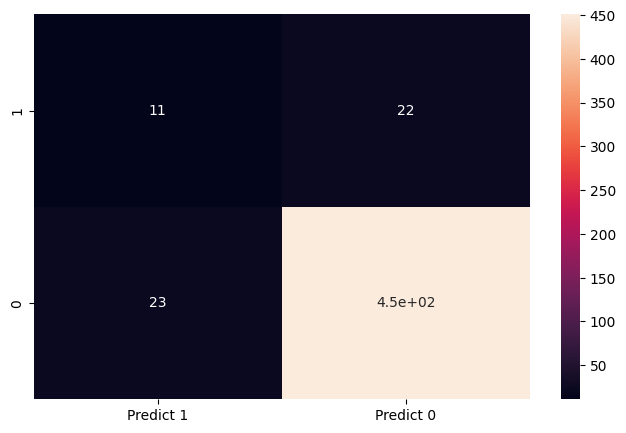

f1 score 0.3283582089552239
Auc Roc Score:  0.6424050632911392


In [ ]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (8,5))
sn.heatmap(df_cm, annot=True)
plt.show()
print("f1 score", metrics.f1_score(y_test,y_predict))
print("Auc Roc Score: ",metrics.roc_auc_score(y_test,y_predict))